In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
learning_rate = 0.01
epoch = 1000

In [3]:
n_samples = 10
X = np.linspace(0,10,n_samples)
Y = 5*X + 5*np.random.randn(n_samples)

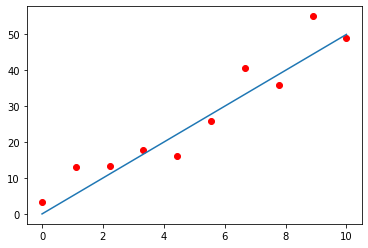

In [4]:
plt.plot(X, Y, 'ro')
plt.plot(X, 5*X)
plt.show()

In [5]:
W = tf.Variable(np.random.rand(), name = 'weights')
B = tf.Variable(np.random.rand(), name = 'bias')

In [6]:
print(W,B)

<tf.Variable 'weights:0' shape=() dtype=float32, numpy=0.58328015> <tf.Variable 'bias:0' shape=() dtype=float32, numpy=0.715181>


In [7]:
# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + B


In [8]:
# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [9]:
# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [10]:
# Optimization process. 
def train_step(X,Y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W,B])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W,B]))

In [11]:
# Run training for the given number of steps.
for epoches in range(epoch):
    # Run the optimization to update W and b values.
    train_step(X,Y)
    
    if (epoches+1) % 100 == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (epoches+1, loss, W.numpy(), B.numpy()))

step: 100, loss: 25.165403, W: 4.986776, b: 1.887677
step: 200, loss: 25.071079, W: 4.943733, b: 2.188129
step: 300, loss: 25.040854, W: 4.919367, b: 2.358211
step: 400, loss: 25.031162, W: 4.905573, b: 2.454493
step: 500, loss: 25.028055, W: 4.897766, b: 2.508996
step: 600, loss: 25.027063, W: 4.893346, b: 2.539848
step: 700, loss: 25.026745, W: 4.890843, b: 2.557315
step: 800, loss: 25.026646, W: 4.889427, b: 2.567201
step: 900, loss: 25.026611, W: 4.888625, b: 2.572798
step: 1000, loss: 25.026604, W: 4.888171, b: 2.575967


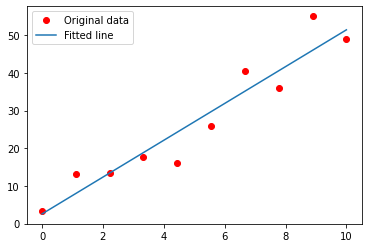

In [12]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + B), label='Fitted line')
plt.legend()
plt.show()